# Abstract : 


The starting point is the fact that I'm hearing more and more about Austin housing market : 

- Big tech companies are massively investing in Texas : Tesla, Google, Space X ...
- All those companies are bringing highly paid worker who modify Austin housing market 
- Airbnb is a known problem regarding housing since it's an investement that contribute to very high rent

**Second point to consider, I have been to Austin several times and I love this city, It is great for outdoors and that will be part of my opinion.** 

**I don't think the outdoor suroundings of Austin are prepared to welcome a massive 2 or 3 millions people, it;s going to become an overcrowded hell very fast.** 

With this in mind, and knowing that Airbnb is nowadays one of the biggest most popular online marketplaces for accommodations, I looked into the data to:

- On one hand evaluate the impact Airbnb has on housing in Austin;
- On the other hand investigate about who, when and how rents out in Austin. 


In [1]:
%matplotlib inline

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as sps    

## Approach

#### **#1** For the first point I mainly looked at listings.

The points that need to be addressed are:

- **Listings types:** Airbnb initial idea was to offer a room or a shared room inside one's own house. Is it still so? Is there more private rooms or full house/appartment ?


- **Listings density:** are listings evenly distributed across all the neighbourhoods or there are some hot areas? Does it make those areas very trendy and hard to rent/buy ? 


- **Ownership:** are properties owned by single private users or are there are users that own and rent out multiple places (i.e. possibly speculating) ?



#### **#2** For the second part I looked more into reviews. Since we do not have historic data about stays but only about reviews, we could use reviews as estimators of stays/visits.

- **Here what we want to see is:**


- **Trend:** has the number of reviews increased over time? If it has, can we say that the increment is due to an increased number of visitors or it must be simply abscribed to an increment in the popularity of the platform ?


- **Seasonality:** is the flow of tourists seasonal, that is does it follow a seasonal trend? Can we explain the pattern?


- **Listings** Is there an historic of the price per listings ? If so Is there a correlation since Tesla moved in and house pricing market ? 



In [2]:
listing_df = pd.read_csv('listings_Austin_Airbnb.csv')

# First analysis : 

- The neighbourhood_group is totaly empty, we will try to populate it with the name 
- last_review, reviews_per_months and host name have missing values we will investigate this
- License is null 

## #1 Fill the neighbourhood group : 

- We are going to map the neihbourhood codes to their actual names : 

In [3]:
# Find the uniques values of the neighbourhood feature : 

listing_df['neighbourhood'].unique()

array([78702, 78729, 78704, 78741, 78759, 78731, 78758, 78705, 78727,
       78703, 78722, 78733, 78701, 78751, 78723, 78752, 78757, 78736,
       78732, 78746, 78754, 78745, 78730, 78724, 78756, 78725, 78749,
       78721, 78734, 78737, 78748, 78738, 78744, 78726, 78753, 78735,
       78750, 78728, 78739, 78717, 78742, 78747, 78712, 78719],
      dtype=int64)

In [4]:
# Create the dictionnary with the name associated with Zip codes : 

neighbourhood_dict = {78701  : 'Downtown', 78704 : 'South Central', 78703 : 'Central Austin', 
                      78705 : 'Central Austin', 78751 : 'Central Austin', 78756 : 'Central Austin', 
                      78757 : 'Central Austin', 78702 : 'East Austin', 78722 : 'East Austin', 
                      78741 : 'Southeast', 78744 : 'Southeast', 78747 : 'Southeast', 78745 : 'South Austin',
                      78748 : 'South Austin', 78735 : 'Southwest Austin', 78736 : 'Southwest Austin', 
                      78738 : 'Southwest Austin', 78739 : 'Southwest Austin', 78733 : 'Westlake Hills',
                      78746 : 'Westlake Hills', 78731 : 'Northwest Austin', 78727 : 'Northwest Austin', 
                      78750 : 'Northwest Austin', 78759 : 'Northwest Austin', 78721 : 'Northeast Austin', 
                      78723 : 'Northeast Austin', 78724 : 'Northeast Austin', 78758 : 'North Austin',
                      78734 : 'Travis County', 78752 : 'St. Johns', 78737 : 'Hays County', 
                      78753 : 'Travis County', 78749 : 'Travis County', 78729 : 'Williamson County',
                      78754 : 'Travis County', 78728 : 'Travis County', 78732 : 'Travis County', 
                      78717 : 'Williamson County', 78725 : 'Travis County', 78730 : 'Travis County', 
                      78726 : 'Travis County'
                      
                      }

In [5]:
# Remap the values of the dataframe

listing_df['neighbourhood_group'] = listing_df.replace({"neighbourhood": neighbourhood_dict})['neighbourhood']

In [6]:
listing_df['neighbourhood_group'].value_counts()[:10]

South Central       1927
Central Austin      1896
East Austin         1648
Southeast           1016
Travis County        807
Downtown             747
South Austin         722
Northeast Austin     696
North Austin         389
Northwest Austin     379
Name: neighbourhood_group, dtype: int64

## #2 Drop license column : 

- We are going to drop the column with license since it's not usefull at this moment for us 

In [7]:
listing_df.drop('license', 1, inplace = True)

C:\Users\johan\AppData\Local\Temp/ipykernel_21932/2236604976.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  listing_df.drop('license', 1, inplace = True)


## #3 Analyse missing values in last review and reviews_per_month : 

- last_review = The date of the last/newest review                  
- reviews_per_month = The number of reviews the listing has over the lifetime of the listing

In [8]:
# Let's look closer to those listing that don't have last_review
filt = listing_df['last_review'].isnull()
las_review_missing = listing_df.loc[filt]
las_review_missing['number_of_reviews'].value_counts()

0    2722
Name: number_of_reviews, dtype: int64

## #4 Analyse the price feature : 

- Compare the price on the dataset and the price on Airbnb Website                 
- Create a column : Price adjusted that represent the real price a costumer would pay on Airbnb : 


First, we need to retrieve the URL of the listing on another table : listing_detailed


In [9]:
listing_dt_df = pd.read_csv('listings_detail_Austin_Airbnb.csv')

In [10]:
# Merging to get some infos from listing detailed : 

df_merged = pd.merge(listing_df, listing_dt_df[['listing_url','id','bedrooms','property_type']], on='id')

In [11]:
df_merged.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,listing_url,bedrooms,property_type
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,East Austin,78702,30.27752,-97.71377,Entire home/apt,179,7,26,2021-07-02,0.36,3,35,2,https://www.airbnb.com/rooms/2265,2.0,Entire residential home
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,East Austin,78702,30.27614,-97.71320,Private room,114,30,9,2017-02-24,0.21,3,0,0,https://www.airbnb.com/rooms/5245,1.0,Private room in residential home
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,East Austin,78702,30.26057,-97.73441,Entire home/apt,108,2,575,2021-09-25,24.16,1,324,39,https://www.airbnb.com/rooms/5456,1.0,Entire guesthouse
3,5769,NW Austin Room,8186,Elizabeth,Williamson County,78729,30.45697,-97.78422,Private room,39,1,264,2021-07-03,5.95,1,0,7,https://www.airbnb.com/rooms/5769,1.0,Private room in residential home
4,6413,Gem of a Studio near Downtown,13879,Todd,South Central,78704,30.24885,-97.73587,Entire home/apt,109,3,117,2021-04-02,1.27,1,0,4,https://www.airbnb.com/rooms/6413,NaN,Entire guesthouse


# Price analysis : 

Prices that are displayed here are HEAVELY misleading why ? 

Let's check this URL row : 

11265 	https://www.airbnb.com/rooms/52772519 	$120.00

We will see later with this host the reality of the price on this airbnb is : 


76 x 1 night

Cleaning fee
95

Service fee
29

Occupancy taxes and fees
10

Total
210

TOTAL = '210' well well a little more than 120$ ?? 

The thing is the Datframe doesn't include any fees, wich make Airbnb a more and more expensive option.

In [12]:
missing_mask = df_merged['bedrooms'].isna()
mapping_dict = dict({'Entire residential home': 2, 'Entire townhouse '  : 2 , 'Entire rental unit' : 1.5 ,
                     'Private room in residential home' : 1, 'Entire condominium (condo)' : 1.5 ,
                     'Entire guesthouse' : 1, 'Entire serviced apartment' : 1, 'Private room in rental unit' :1})

df_merged.loc[missing_mask, 'bedrooms'] = df_merged.loc[missing_mask, 'property_type'].map(mapping_dict)




In [13]:
df_merged['bedrooms'] = df_merged['bedrooms'].fillna(1)

In [14]:
df_merged['bedrooms'].isnull().value_counts()

False    11269
Name: bedrooms, dtype: int64

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11269 entries, 0 to 11268
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11269 non-null  int64  
 1   name                            11269 non-null  object 
 2   host_id                         11269 non-null  int64  
 3   host_name                       11218 non-null  object 
 4   neighbourhood_group             11269 non-null  object 
 5   neighbourhood                   11269 non-null  int64  
 6   latitude                        11269 non-null  float64
 7   longitude                       11269 non-null  float64
 8   room_type                       11269 non-null  object 
 9   price                           11269 non-null  int64  
 10  minimum_nights                  11269 non-null  int64  
 11  number_of_reviews               11269 non-null  int64  
 12  last_review                     

In [16]:
df_merged.bedrooms.value_counts()

1.0     5444
2.0     2796
3.0     1613
4.0      684
1.5      359
5.0      232
6.0       77
7.0       31
8.0       14
9.0        7
10.0       5
12.0       2
13.0       1
15.0       1
23.0       1
14.0       1
11.0       1
Name: bedrooms, dtype: int64

### Now let's assign the adjusted price to the Airbnb based on the cleaning fee =f(bedrooms) : 

- 1 bedroom = 50
- 2 bedrooms = 75
- 3 bedrooms = 100
- 4 bedrooms = 120
- Everything higher will be 150 

In [17]:
cleaning_fee_dict = dict({1: 50, 2: 75 , 3: 100 , 4 : 120})

In [18]:
# Remap the values of the dataframe

df_merged['cleaning_fee'] = df_merged['bedrooms'].map(cleaning_fee_dict)
df_merged['cleaning_fee'].value_counts().sum()
df_merged['cleaning_fee'] = df_merged['cleaning_fee'].fillna(150)

In [19]:
df_merged['adjusted_price'] = df_merged['price'] + df_merged['cleaning_fee']

In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11269 entries, 0 to 11268
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              11269 non-null  int64  
 1   name                            11269 non-null  object 
 2   host_id                         11269 non-null  int64  
 3   host_name                       11218 non-null  object 
 4   neighbourhood_group             11269 non-null  object 
 5   neighbourhood                   11269 non-null  int64  
 6   latitude                        11269 non-null  float64
 7   longitude                       11269 non-null  float64
 8   room_type                       11269 non-null  object 
 9   price                           11269 non-null  int64  
 10  minimum_nights                  11269 non-null  int64  
 11  number_of_reviews               11269 non-null  int64  
 12  last_review                     

# Second analysis : Investigate the Dataset :  

- #1 Listing per room type % 
- #2 Listing per district 
- #3 Room type proportion, district comparaison
- #4 % of host who have more than 1 listing per neighboorood 
- #5 Price distribution 
- #6 Price distribution per Neighboorood 


In [21]:
# Let's see what kind of housing distribution type we have : 

room_type_dist = df_merged.groupby('room_type').agg({'id': 'count'})
room_type_sum = df_merged.groupby('room_type').count()['id'].sum()
room_type_dist = (room_type_dist / room_type_sum *100).sort_values(by='id', ascending = False)
print(room_type_dist)

                        id
room_type                 
Entire home/apt  80.628272
Private room     18.200373
Shared room       1.073742
Hotel room        0.097613


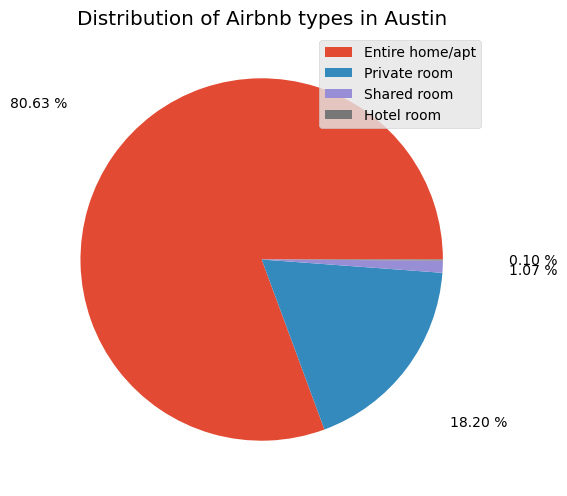

In [22]:
plt.figure(figsize=(9,6), dpi = 100)
plt.style.use('ggplot')
label = room_type_dist.index

perc = [c for c in room_type_dist['id']]


plt.pie(perc,autopct='%.2f %%',labeldistance=1.3,pctdistance=1.5)
plt.title('Distribution of Airbnb types in Austin')

plt.legend(labels=label)
plt.show()

# We can already notice that despite Airbnb being originally created to share rooms, 
# in Austin more than 80% of the listings are actually about entire homes or apartments 
# or even hotel rooms, while private and shared rooms make less than 20%. 
# This is already an alarming piece of information.

#2 Listing per district : 

In [23]:
nei = df_merged.groupby('neighbourhood_group').agg({'id': 'count'})
nei_sum = df_merged.groupby('neighbourhood_group').count()['id'].sum()
nei = (nei / nei_sum *100).sort_values(by='id', ascending = False)

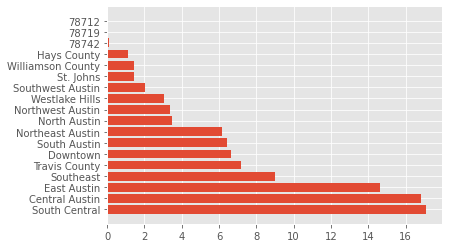

In [24]:
nei_perc = [round(c,2) for c in nei['id']]
label = [str(i) for i in nei.index ] 

plt.barh(label, nei_perc)
plt.show()

South Central & Central Austin is one of the most in-demand areas of Austin, and the neighborhood’s apartments and condos are especially popular with young people. UT ....



In [25]:
host = df_merged.groupby(['host_id','neighbourhood_group']).agg({'id' : 'count'})
host.sort_values('id', ascending = False)

id
host_id   neighbourhood_group    
359036978 North Austin         77
8167447   Central Austin       76
359036978 Central Austin       64
          Southwest Austin     54
194953121 Downtown             47
...                            ..
23587334  East Austin           1
23566680  South Central         1
23561867  Southeast             1
23538977  Northeast Austin      1
426962110 Travis County         1

[7797 rows x 1 columns]

In [26]:
df_merged[df_merged['host_id'] == 8167447]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,listing_url,bedrooms,property_type,cleaning_fee,adjusted_price
1419,6955450,Guadalupe: Austin Young Professional Community,8167447,Martin,Central Austin,78751,30.32197,-97.72521,Private room,41,...,2021-04-08,0.34,76,162,3,https://www.airbnb.com/rooms/6955450,1.0,Private room in residential home,50.0,91.0
1429,7108253,Guadalupe: Austin Tech Community,8167447,Martin,Central Austin,78751,30.32197,-97.72521,Private room,41,...,2019-08-17,0.16,76,346,0,https://www.airbnb.com/rooms/7108253,1.0,Private room in residential home,50.0,91.0
1453,7440637,Guadalupe: Austin Tech and Young Professionals,8167447,Martin,Central Austin,78751,30.32229,-97.72521,Private room,41,...,2021-07-30,0.12,76,347,1,https://www.airbnb.com/rooms/7440637,1.0,Private room in residential home,50.0,91.0
1489,7746849,Guadalupe: 30 Room Young Professional House,8167447,Martin,Central Austin,78751,30.32197,-97.72521,Private room,41,...,2021-06-10,0.13,76,316,1,https://www.airbnb.com/rooms/7746849,1.0,Private room in residential home,50.0,91.0
1492,7750755,Guadalupe: Awesome spot for people new to town,8167447,Martin,Central Austin,78751,30.32197,-97.72521,Private room,41,...,2021-06-17,0.80,76,351,2,https://www.airbnb.com/rooms/7750755,1.0,Private room in residential home,50.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7219,42118859,800 Private Room in Great Community,8167447,Martin,Central Austin,78751,30.32123,-97.72420,Private room,33,...,2021-03-01,0.13,76,300,1,https://www.airbnb.com/rooms/42118859,1.0,Private room in residential home,50.0,83.0
7459,42860906,800 Private Room in Great Community 2,8167447,Martin,Central Austin,78751,30.31949,-97.72900,Private room,33,...,2021-08-31,0.18,76,261,2,https://www.airbnb.com/rooms/42860906,1.0,Private room in residential home,50.0,83.0
7744,44476530,Guadalupe: Economic Spot,8167447,Martin,Central Austin,78751,30.32265,-97.72604,Shared room,17,...,2021-06-03,0.25,76,304,2,https://www.airbnb.com/rooms/44476530,1.0,Shared room in residential home,50.0,67.0
7784,44753345,800 Private Room in Great Community 3,8167447,Martin,Central Austin,78751,30.32112,-97.72629,Private room,30,...,2021-04-08,0.23,76,318,2,https://www.airbnb.com/rooms/44753345,1.0,Private room in residential home,50.0,80.0


In [27]:
hosts_per_neighbourhood = df_merged.groupby('neighbourhood_group')['host_id'].nunique()
hosts_per_neighbourhood.drop(78712, inplace =True)
hosts_per_neighbourhood

neighbourhood_group
78719                   4
78742                   6
Central Austin       1278
Downtown              349
East Austin          1137
Hays County            83
North Austin          201
Northeast Austin      541
Northwest Austin      312
South Austin          549
South Central        1359
Southeast             763
Southwest Austin      141
St. Johns             103
Travis County         596
Westlake Hills        252
Williamson County     122
Name: host_id, dtype: int64

In [28]:
listings_per_host_per_neighbourhood = (
    (df_merged[
        df_merged['room_type']
        .isin(['Entire home/apt', 'Hotel room'])]
    .groupby('neighbourhood_group')
    .size() / hosts_per_neighbourhood)
    .iloc[::-1]
)

listings_per_host_per_neighbourhood

neighbourhood_group
Williamson County    0.770492
Westlake Hills       1.190476
Travis County        0.946309
St. Johns            1.330097
Southwest Austin     1.397163
Southeast            0.925295
South Central        1.268580
South Austin         0.925319
Northwest Austin     0.881410
Northeast Austin     0.955638
North Austin         1.626866
Hays County          1.397590
East Austin          1.256816
Downtown             1.936963
Central Austin       1.183881
78742                1.500000
78719                1.250000
dtype: float64

In [29]:
multiple_listings_perc_per_neighbourhood = (
    (df_merged
    [df_merged['room_type'].isin(['Entire home/apt', 'Hotel room'])]
    .groupby(['neighbourhood_group', 'host_id'])
    .size().ge(5)
    .groupby('neighbourhood_group')
    .sum() / hosts_per_neighbourhood)
    .iloc[::-1]
)

multiple_listings_perc_per_neighbourhood

neighbourhood_group
Williamson County    0.000000
Westlake Hills       0.027778
Travis County        0.016779
St. Johns            0.019417
Southwest Austin     0.021277
Southeast            0.009174
South Central        0.024283
South Austin         0.010929
Northwest Austin     0.012821
Northeast Austin     0.009242
North Austin         0.029851
Hays County          0.036145
East Austin          0.024626
Downtown             0.063037
Central Austin       0.022692
78742                0.166667
78719                0.000000
dtype: float64

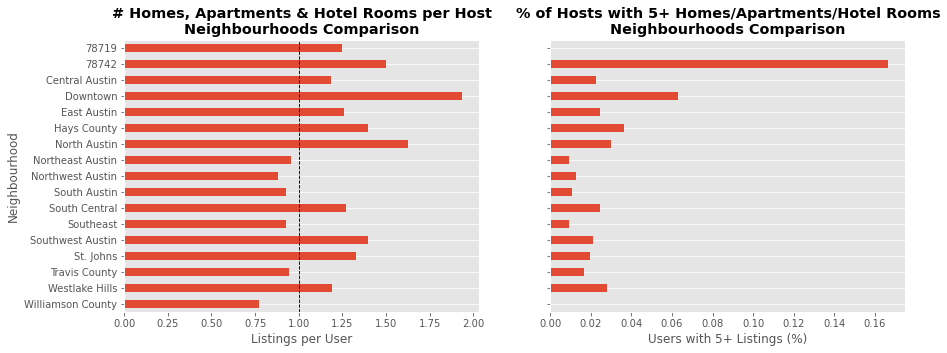

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharey=True)

(listings_per_host_per_neighbourhood
 .plot(kind='barh', ax=ax1))

(multiple_listings_perc_per_neighbourhood
 .plot(kind='barh', ax=ax2))

ax1.grid(axis='x')
ax2.grid(axis='x')
ax1.set_ylabel('Neighbourhood')
ax1.set_xlabel('Listings per User')
ax2.set_xlabel('Users with 5+ Listings (%)')
ax1.axvline(1, c='k', ls='--', lw=.9)

ax1.set_title('# Homes, Apartments & Hotel Rooms per Host\nNeighbourhoods Comparison', weight='bold')
ax2.set_title('% of Hosts with 5+ Homes/Apartments/Hotel Rooms\nNeighbourhoods Comparison', weight='bold')

plt.show()

<Figure size 720x432 with 0 Axes>

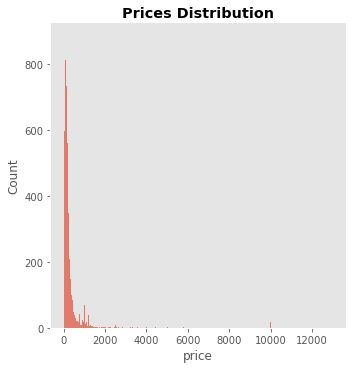

In [31]:


plt.figure(figsize=(10,6))
sns.displot(df_merged['price'])
plt.title('Prices Distribution', weight='bold')
plt.grid()

plt.show()

# Clearly some outliers here so I'm going to keep everything bellow 2000

C:\Users\johan\anaconda3\envs\PyCharmLearningProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\envs\PyCharmLearningProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


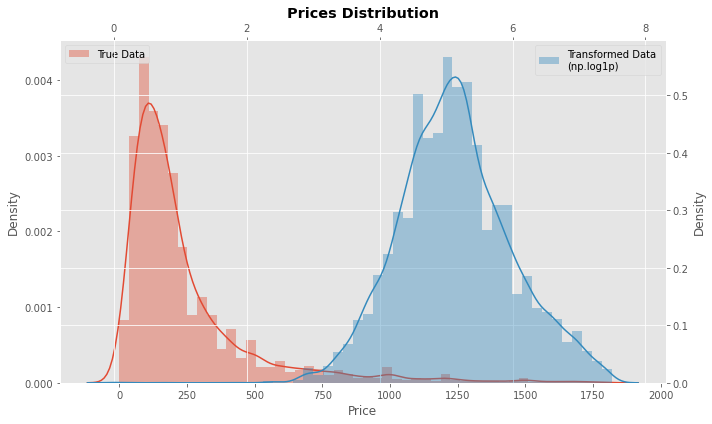

In [32]:

df_merged = df_merged[df_merged['price'] < 1800]
trans_prices = df_merged['price'].pipe(np.log1p)

fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twiny().twinx()

sns.distplot(df_merged['price'], ax=ax, label='True Data')
sns.distplot(trans_prices, color=sns.color_palette()[1], ax=ax2, label='Transformed Data\n(np.log1p)')
ax.set_title('Prices Distribution', weight='bold')
ax.grid()
ax.legend(loc=2)
ax2.legend(loc=1)
ax.set_xlabel('Price')
ax.set_ylabel('Density')

fig.tight_layout()
plt.show()





Since they are still slightly skewed, I normalize prices with a logaritmic transformation.

Let's see if price has different distribution depending on the language. To do this, we will do a graphical evaluation and then we will apply a statistical test (T-test for independent samples).


C:\Users\johan\anaconda3\envs\PyCharmLearningProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\envs\PyCharmLearningProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


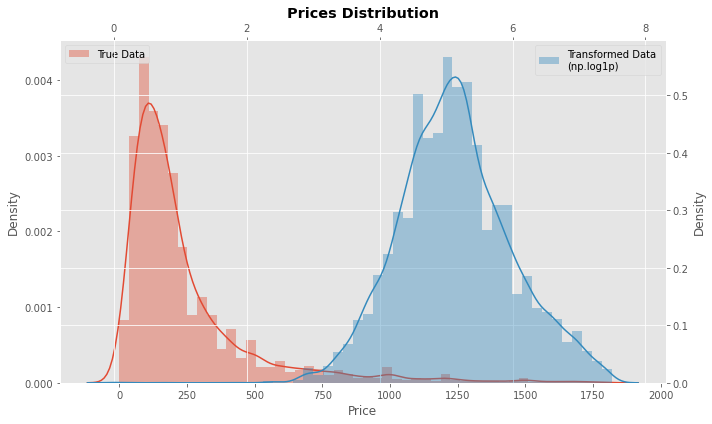

In [33]:

df_merged = df_merged[df_merged['price'] < 1800]
trans_prices = df_merged['price'].pipe(np.log1p)

fig, ax = plt.subplots(figsize=(10,6))
ax2 = ax.twiny().twinx()

sns.distplot(df_merged['price'], ax=ax, label='True Data')
sns.distplot(trans_prices, color=sns.color_palette()[1], ax=ax2, label='Transformed Data\n(np.log1p)')
ax.set_title('Prices Distribution', weight='bold')
ax.grid()
ax.legend(loc=2)
ax2.legend(loc=1)
ax.set_xlabel('Price')
ax.set_ylabel('Density')

fig.tight_layout()
plt.show()

In [54]:
def price_dist(neib) : 
    
    df_nei = df_merged.loc[df_merged['neighbourhood_group'].isin([neib])]
    trans_prices_nei = df_nei['price'].pipe(np.log1p)
    fig, ax = plt.subplots(figsize=(10,6))
    ax2 = ax.twiny().twinx()

    sns.distplot(df_nei['price'], ax=ax, label='True Data')
    sns.distplot(trans_prices_nei, color=sns.color_palette()[1], ax=ax2, label='Transformed Data\n(np.log1p)')
    ax.set_title('Prices Distribution in' + " " + neib, weight='bold')
    ax.grid()
    ax.legend(loc=2)
    ax2.legend(loc=1)
    ax.set_xlabel('Price')
    ax.set_ylabel('Density')

    fig.tight_layout()
    return plt.show()

C:\Users\johan\anaconda3\envs\PyCharmLearningProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\johan\anaconda3\envs\PyCharmLearningProject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


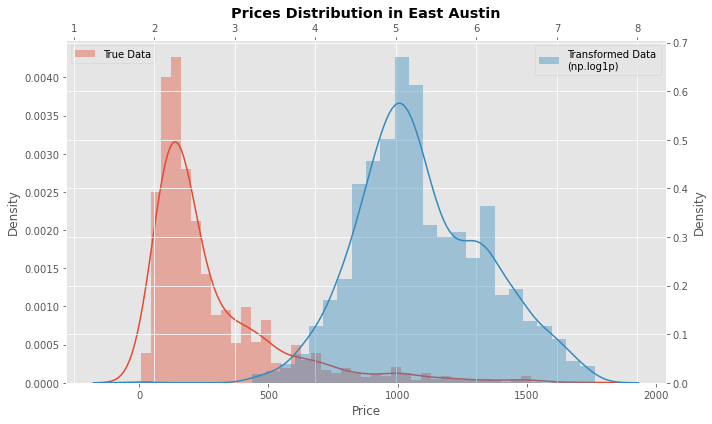

In [55]:
price_dist('East Austin')